# Import Dataset

In [3]:
#Import library pandas
import pandas as pd

#Import library numpy
import numpy as np

#Import library matplotlib dan seaborn untuk visualisasi
from matplotlib import pyplot as plt
import seaborn as sns

#me-non aktifkan peringatan pada python
import warnings
warnings.filterwarnings("ignore")

In [7]:
#Import dataset Crop_recomendation.csv
dataset="Crop_recommendation.csv"
crop=pd.read_csv(dataset)

# Data Understanding

In [6]:
#Check head
crop.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
#Check tail
crop.tail(5)

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [8]:
#Check data types
crop.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [9]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
#Hitung ukuran (jumlah baris dan kolom) dari dataset
print("Ukuran df: %d baris, %d kolom." % crop.shape)

Ukuran df: 2200 baris, 8 kolom.


In [11]:
#Describe data
crop.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
N,2200.0,NaN,NaN,NaN,50.551818,36.917334,0.0,21.0,37.0,84.25,140.0
P,2200.0,NaN,NaN,NaN,53.362727,32.985883,5.0,28.0,51.0,68.0,145.0
K,2200.0,NaN,NaN,NaN,48.149091,50.647931,5.0,20.0,32.0,49.0,205.0
temperature,2200.0,NaN,NaN,NaN,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,NaN,NaN,NaN,71.481779,22.263812,14.25804,60.261953,80.473146,89.948771,99.981876
ph,2200.0,NaN,NaN,NaN,6.46948,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,NaN,NaN,NaN,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117
label,2200,22,rice,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Menghitung frekuensi pada kolom label
crop["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

# Data Cleaning

In [13]:
#Check missing data
crop.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

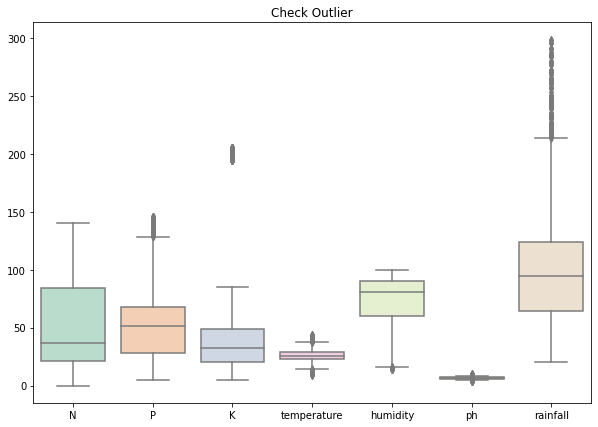

In [14]:
#Check outlier data dengan visualisasi boxplot
plt.subplots(figsize=(10,7))
sns.boxplot(data=crop, palette="Pastel2").set_title("Check Outlier")
plt.show()

In [5]:
#Define fungsi untuk check outlier
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

def remove_outliers(df, x):
    return df.drop((detect_outliers(df, x)).index, axis=0)

In [4]:
#define function for outlier using Z-scores
from scipy.stats import zscore

def z_score_outliers(df):
    label = df['label']
    df_numeric = df.select_dtypes(exclude=["object"])
    #z_score = df_numeric.apply(zscore)
    z_score = df_numeric.apply(lambda x: (x - x.mean()) / x.std(ddof=1), 
                        axis=0, raw=False, result_type='broadcast')
    threshold = 1.63
    outliers = (z_score.abs() > threshold).any(axis=1)
    df_clean = df_numeric[~outliers]
    df_clean = pd.concat([label[~outliers].reset_index(drop=True),
                          df_clean.reset_index(drop=True)], 
                         axis=1)
    return df_clean


In [17]:
print("Ukuran dataframe sebelum dihilangkan outlier: %d baris, %d kolom." % crop.shape)

Ukuran dataframe sebelum dihilangkan outlier: 2200 baris, 8 kolom.


In [18]:
#Menggunakan metode IQ untuk menghilangkan Outlier

crop_IQ = crop
    
#Menghilangkan data outlier kolom N
crop_IQ=remove_outliers(crop_IQ,"N")

#Menghilangkan data outlier kolom P
crop_IQ=remove_outliers(crop_IQ,"P")

#Menghilangkan data outlier kolom K
crop_IQ=remove_outliers(crop_IQ,"K")

#Menghilangkan data outlier kolom rainfall
crop_IQ=remove_outliers(crop_IQ,"rainfall")

#Menghilangkan data outlier kolom temperature
crop_IQ=remove_outliers(crop_IQ,"temperature")

#Menghilangkan data outlier kolom ph
crop_IQ=remove_outliers(crop_IQ,"ph")

#Menghilangkan data outlier kolom humidity
crop_IQ=remove_outliers(crop_IQ,"humidity")

#Hitung ukuran (jumlah baris dan kolom) dari dataset
print("Ukuran df sekarang dengan metode IQ: %d baris, %d kolom." % crop_IQ.shape)

Ukuran df sekarang dengan metode IQ: 1836 baris, 8 kolom.


In [35]:
#Mengggunakan metode zscore
zscore_method = crop
zscore_method=z_score_outliers(zscore_method)
#Hitung ukuran (jumlah baris dan kolom) dari dataset
print("Ukuran df sekarang dengan metode zscore: %d baris, %d kolom." % zscore_method.shape)

Ukuran df sekarang dengan metode zscore: 1212 baris, 8 kolom.


Text(0.5, 1.0, 'Zscore Method')

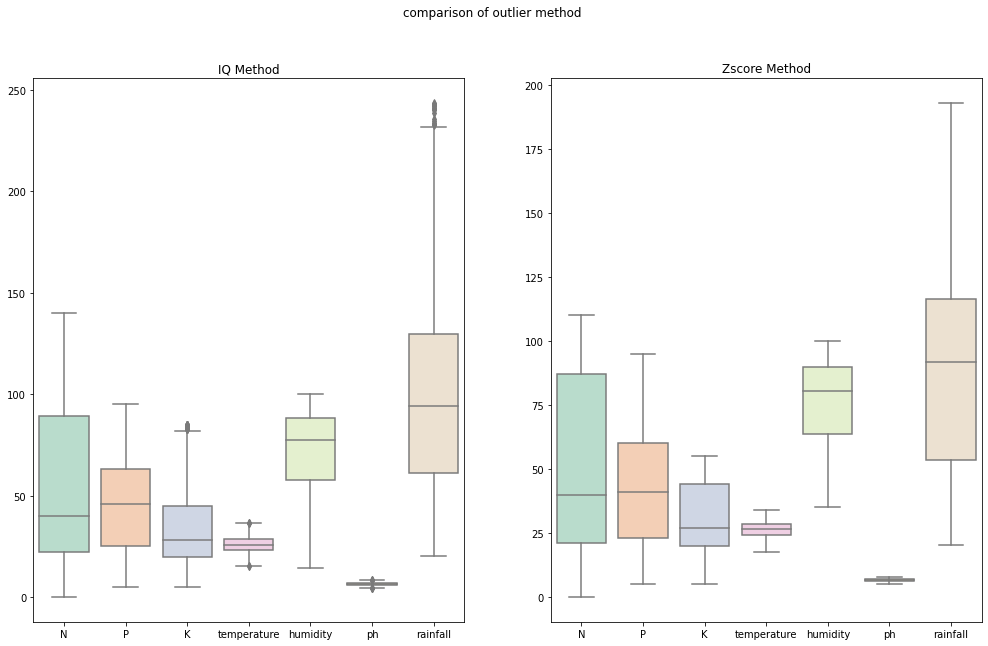

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(17,10))
fig.suptitle('comparison of outlier method')
sns.boxplot(ax=axes[0], data=crop_IQ, palette="Pastel2").set_title("IQ Method")
sns.boxplot(ax=axes[1], data=zscore_method, palette="Pastel2").set_title("Zscore Method")

In [36]:
crop = zscore_method

In [22]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,52.080858,42.722772,30.928218,26.252071,75.989738,6.524666,93.310047
std,35.175531,22.625279,13.240666,3.416828,15.069692,0.543268,46.763922
min,0.000000,5.000000,5.000000,17.665454,35.290065,5.243635,20.211267
25%,21.000000,23.000000,20.000000,24.253893,63.526539,6.130154,53.329909
50%,40.000000,41.000000,27.000000,26.455983,80.416990,6.510800,91.598707
75%,87.000000,60.000000,44.000000,28.663670,89.659305,6.919455,116.464918
max,110.000000,95.000000,55.000000,33.864294,99.981876,7.728832,192.903631


In [23]:
crop.isnull()

,label,N,P,K,temperature,humidity,ph,rainfall
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1207,False,False,False,False,False,False,False,False
1208,False,False,False,False,False,False,False,False
1209,False,False,False,False,False,False,False,False
1210,False,False,False,False,False,False,False,False


# Data Visualization

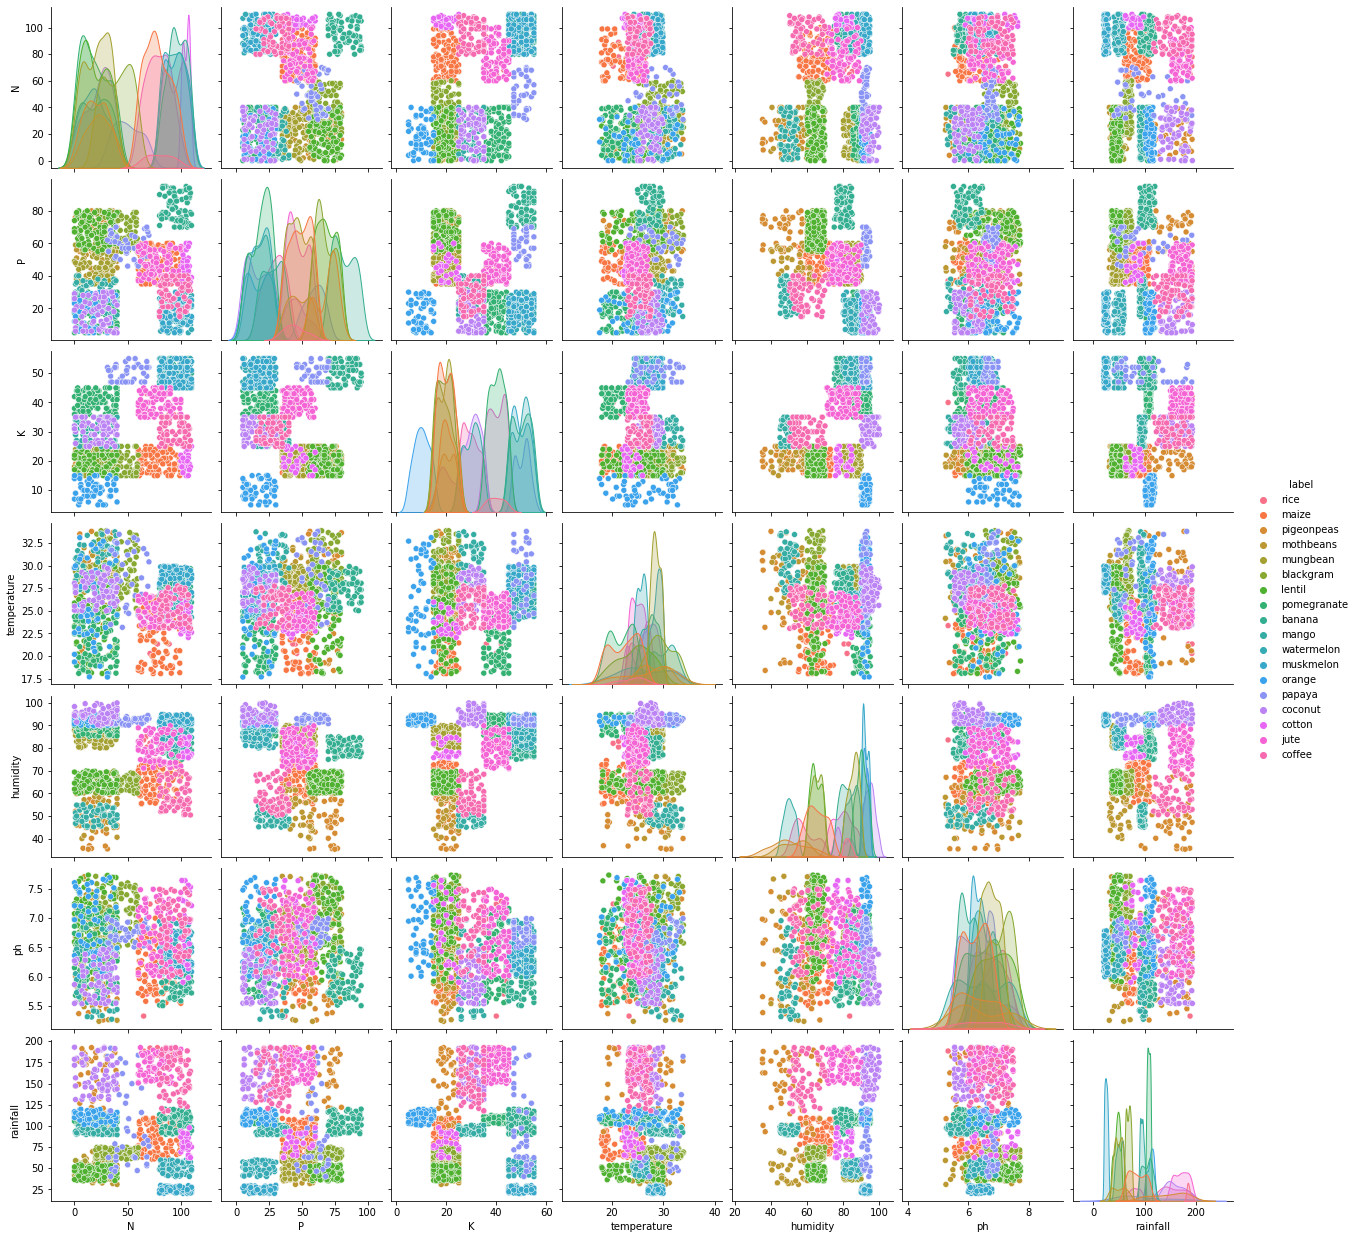

In [24]:
sns.pairplot(crop, hue="label")

In [25]:
#Melakukan describe data
crop.describe(include="all")

,label,N,P,K,temperature,humidity,ph,rainfall
count,1212,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
unique,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,mungbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,52.080858,42.722772,30.928218,26.252071,75.989738,6.524666,93.310047
std,NaN,35.175531,22.625279,13.240666,3.416828,15.069692,0.543268,46.763922
min,NaN,0.000000,5.000000,5.000000,17.665454,35.290065,5.243635,20.211267
25%,NaN,21.000000,23.000000,20.000000,24.253893,63.526539,6.130154,53.329909
50%,NaN,40.000000,41.000000,27.000000,26.455983,80.416990,6.510800,91.598707
75%,NaN,87.000000,60.000000,44.000000,28.663670,89.659305,6.919455,116.464918


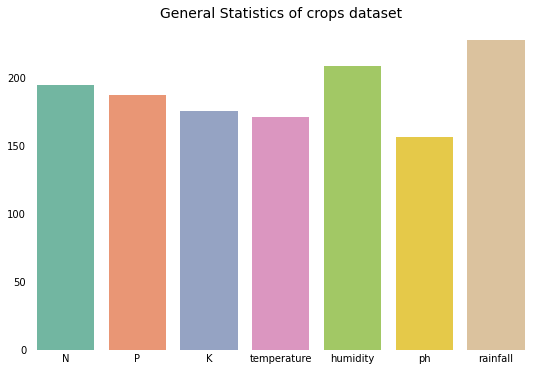

In [26]:
#Visualisasi describe
#crop.describe().plot(kind = "bar", figsize = (12,8), colormap = "Set2")
fig, ax=plt.subplots(figsize=(9,6))
sns.barplot(data=crop.describe(),palette='Set2',ci=None, ax=ax)
ax.set_title("General Statistics of crops dataset",fontsize=14)
ax.tick_params(labelsize=10, length=0)
plt.box(False)

# Data Correlation

In [27]:
#Check correlation
crop.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,0.004888,0.499766,-0.078291,0.084845,-0.077701,0.038512
P,0.004888,1.000000,-0.186888,0.106989,-0.398215,0.092349,-0.075015
K,0.499766,-0.186888,1.000000,0.015409,0.417736,-0.233998,0.061964
temperature,-0.078291,0.106989,0.015409,1.000000,-0.076115,0.035848,-0.165295
humidity,0.084845,-0.398215,0.417736,-0.076115,1.000000,-0.037696,-0.020103
ph,-0.077701,0.092349,-0.233998,0.035848,-0.037696,1.000000,-0.116427
rainfall,0.038512,-0.075015,0.061964,-0.165295,-0.020103,-0.116427,1.000000


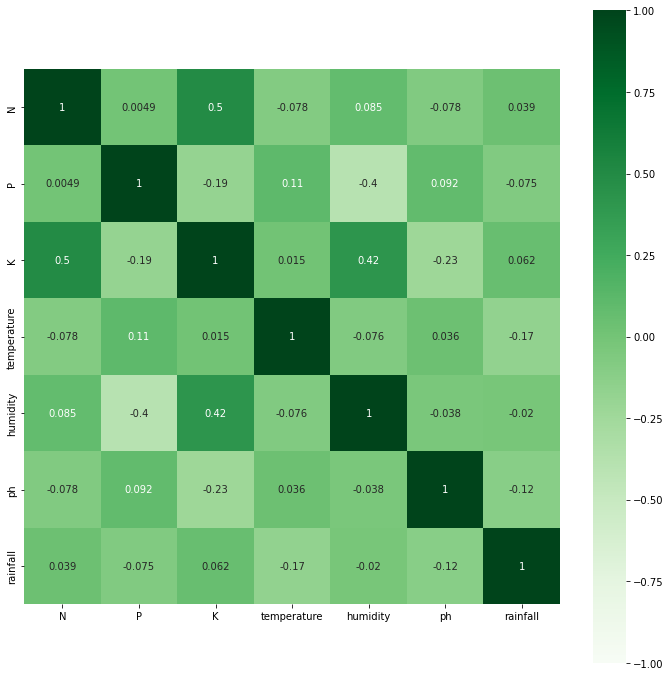

In [28]:
# lihat visualisasi korelasi dengan heatmap
fig=plt.gcf()
fig.set_size_inches(12,12)
fig=sns.heatmap(crop.corr(),annot=True,cmap='Greens'
                ,linecolor='k',square=True,
                mask=False, vmin=-1, vmax=1,
                cbar_kws={"orientation": "vertical"},
                cbar=True)

# Data Train

In [50]:
X=crop.drop(columns="label").values
y=crop["label"].values

array(['rice', 'rice', 'rice', ..., 'coffee', 'coffee', 'coffee'],
      dtype=object)

In [1]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report

# Import libarary confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 


In [32]:
#Train and Test split
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [63]:
# Import libarary Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression()
grid ={
    "penalty" : ['l1', 'l2'],
    "C":np.logspace(-4, 4, 20),
    "intercept_scaling": ['liblinear'],
    "solver":["lbfgs", "liblinear", "newton-cg",
              "newton-cholesky", 'sag', 'saga'],
    "max_iter":[20, 40, 60]
}
clf_logreg = GridSearchCV(logreg, param_grid = grid, cv=5, verbose=True, n_jobs=-1)
clf_logreg.fit(X_train, y_train)
clf_logreg.best_params_

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


{'C': 0.012742749857031334,
 'intercept_scaling': 'liblinear',
 'max_iter': 40,
 'penalty': 'l2',
 'solver': 'newton-cg'}

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        13
   blackgram       1.00      1.00      1.00        16
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        14
      cotton       1.00      1.00      1.00         8
        jute       0.82      0.95      0.88        19
      lentil       0.96      1.00      0.98        22
       maize       1.00      1.00      1.00        17
       mango       1.00      1.00      1.00        17
   mothbeans       1.00      0.86      0.92         7
    mungbean       1.00      1.00      1.00        15
   muskmelon       1.00      1.00      1.00        14
      orange       1.00      1.00      1.00         6
      papaya       0.89      1.00      0.94         8
  pigeonpeas       1.00      1.00      1.00         7
 pomegranate       1.00      1.00      1.00        23
        rice       0.00      0.00      0.00         4
  watermelon       1.00    

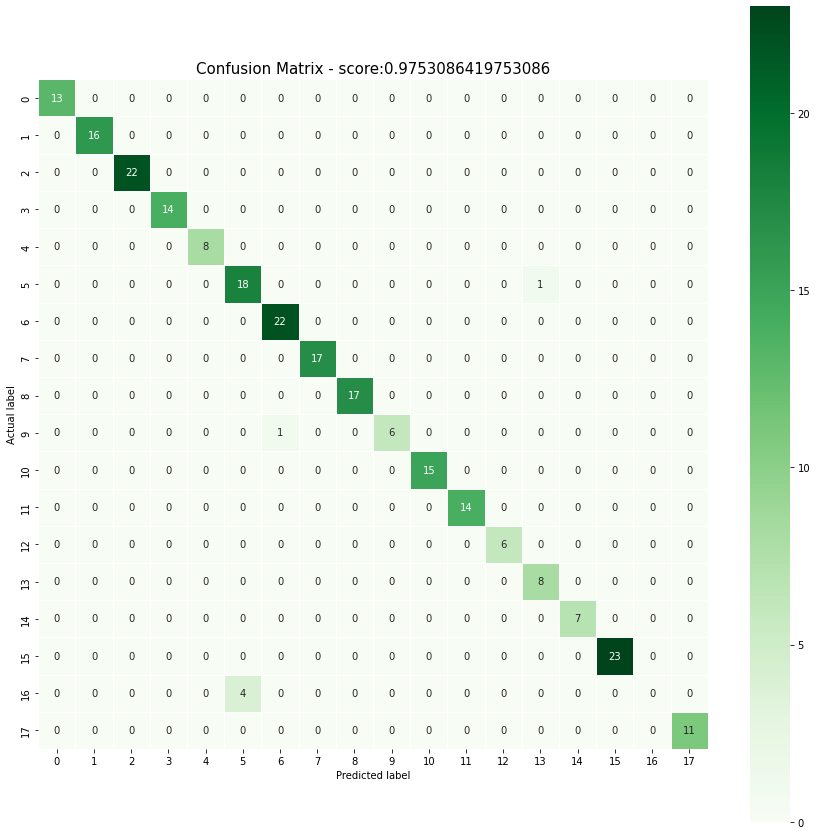

In [61]:
# Import libarary Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.012742749857031334, 
                            intercept_scaling='liblinear',
                            max_iter=40, penalty='l2',solver= 'newton-cg')
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print(classification_report(y_test, Y_pred))
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, )
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, 
            cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,Y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [80]:
# Import libarary KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

grid ={
    "n_neighbors":[5, 6, 7],
    "weights": ["uniform", "distance"],
    "algorithm":["ball_tree", "kd_tree", "brute", "auto"],
    "leaf_size":[10, 20, 30, 40, 50],
    "p": [1, 2, 3]
}

clf_knn = GridSearchCV(knn, param_grid = grid, cv=5, verbose=True, n_jobs=-1)
clf_knn.fit(X_train, y_train)
clf_knn.best_params_

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


{'algorithm': 'ball_tree',
 'leaf_size': 10,
 'n_neighbors': 6,
 'p': 1,
 'weights': 'distance'}

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        13
   blackgram       1.00      1.00      1.00        16
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        14
      cotton       0.89      1.00      0.94         8
        jute       0.83      1.00      0.90        19
      lentil       0.96      1.00      0.98        22
       maize       1.00      0.94      0.97        17
       mango       1.00      1.00      1.00        17
   mothbeans       1.00      0.86      0.92         7
    mungbean       1.00      1.00      1.00        15
   muskmelon       1.00      1.00      1.00        14
      orange       1.00      1.00      1.00         6
      papaya       1.00      1.00      1.00         8
  pigeonpeas       1.00      1.00      1.00         7
 pomegranate       1.00      1.00      1.00        23
        rice       0.00      0.00      0.00         4
  watermelon       1.00    

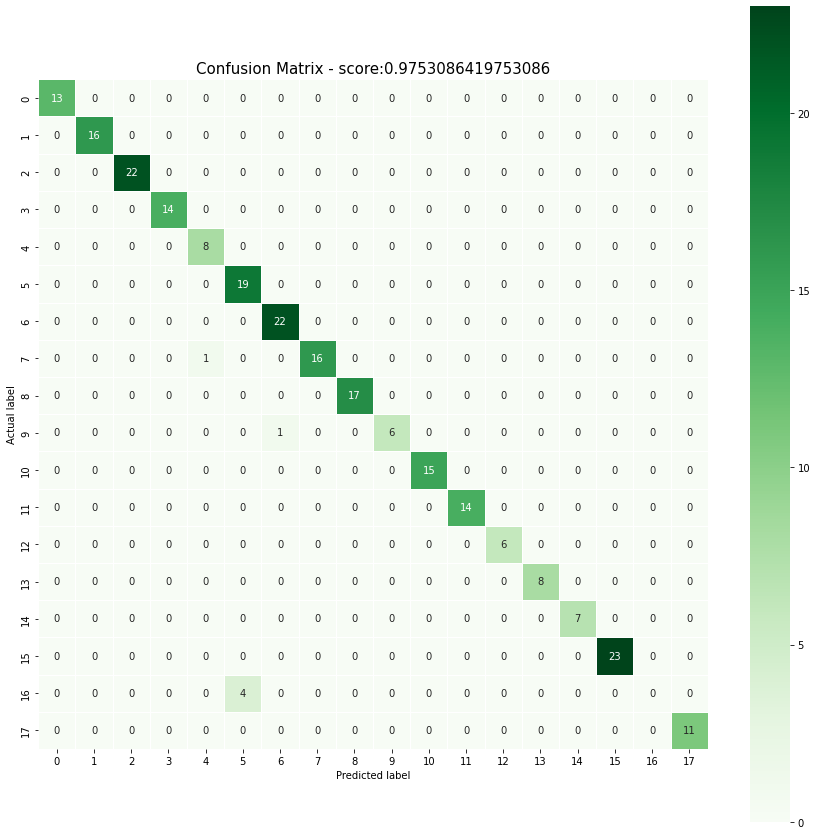

In [62]:
# Import libarary KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 6, weights='distance',
                           algorithm='ball_tree', leaf_size=10,
                           p=1, n_jobs=-1)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test) 
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')

print(classification_report(y_test, Y_pred))
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, )
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, 
            cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,Y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [18]:
dataset="Crop_recommendation.csv"
crop=pd.read_csv(dataset)
zscore_method = crop
zscore_method=z_score_outliers(zscore_method)
crop = zscore_method
X=crop.drop(columns="label").values
y=crop["label"].values
#Train and Test split
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.8, 
                                                 test_size = 0.2, 
                                                 random_state = 0)

In [45]:
# Import libarary KNN
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
gaussianNB= GaussianNB()

grid ={
    'var_smoothing': np.logspace(0,-9, num=100),
}

clf_gaussianNB = GridSearchCV(gaussianNB, param_grid = grid, cv=5,
                       verbose=True, n_jobs=-1)
clf_gaussianNB.fit(X_train, y_train)
clf_gaussianNB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 1e-05}

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        13
   blackgram       1.00      1.00      1.00        16
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        14
      cotton       0.89      1.00      0.94         8
        jute       0.95      1.00      0.97        19
      lentil       1.00      1.00      1.00        22
       maize       1.00      0.94      0.97        17
       mango       1.00      1.00      1.00        17
   mothbeans       1.00      1.00      1.00         7
    mungbean       1.00      1.00      1.00        15
   muskmelon       1.00      1.00      1.00        14
      orange       1.00      1.00      1.00         6
      papaya       1.00      1.00      1.00         8
  pigeonpeas       1.00      1.00      1.00         7
 pomegranate       1.00      1.00      1.00        23
        rice       1.00      0.75      0.86         4
  watermelon       1.00    

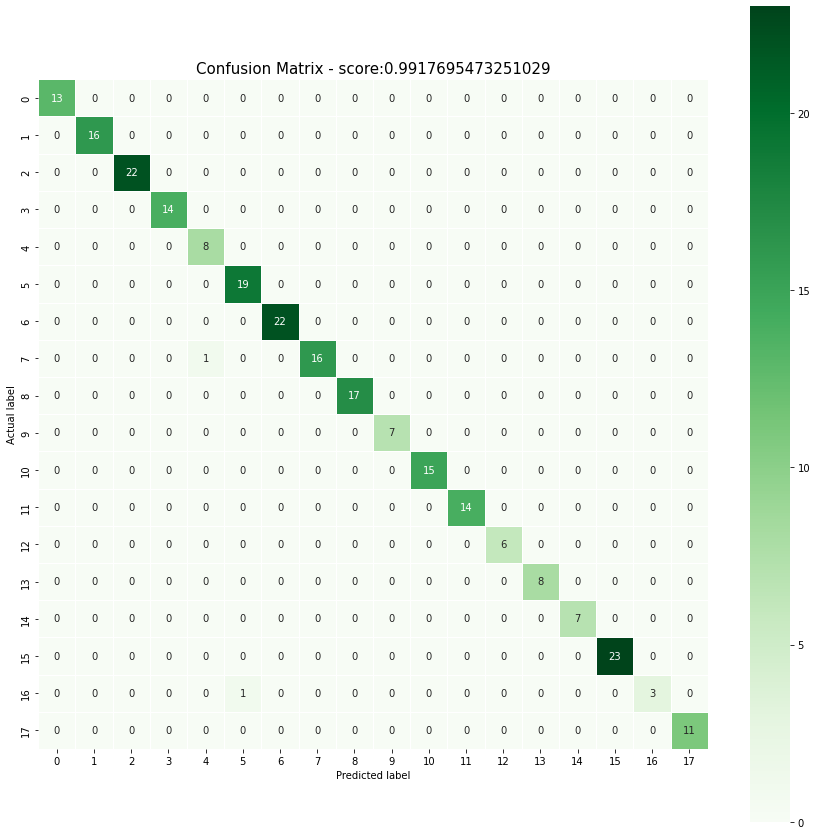

In [59]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
# Import library Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB(var_smoothing=1e-05)
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')

print(classification_report(y_test, Y_pred))
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, )
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, 
            cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,Y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [19]:
# Import libarary KNN
from sklearn.svm import SVC

svc = SVC()

grid ={
    'C':[1, 2, 4, 5],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'degree':[1, 2, 3, 4],
    'gamma':['scale','auto'],
    'probability':[True, False],
    'decision_function_shape':['ovo','ovr'],
    'max_iter':[-1, 0, 1, 2]
}

clf_svc= GridSearchCV(svc, param_grid = grid, cv=5,
                       verbose=True, n_jobs=-1)
clf_svc.fit(X_train, y_train)
clf_svc.best_params_

Fitting 5 folds for each of 2048 candidates, totalling 10240 fits


{'C': 2,
 'decision_function_shape': 'ovo',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': True}

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        13
   blackgram       1.00      1.00      1.00        16
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        14
      cotton       1.00      1.00      1.00         8
        jute       0.82      0.95      0.88        19
      lentil       0.96      1.00      0.98        22
       maize       1.00      1.00      1.00        17
       mango       1.00      1.00      1.00        17
   mothbeans       1.00      0.86      0.92         7
    mungbean       1.00      1.00      1.00        15
   muskmelon       1.00      1.00      1.00        14
      orange       1.00      1.00      1.00         6
      papaya       0.89      1.00      0.94         8
  pigeonpeas       1.00      1.00      1.00         7
 pomegranate       1.00      1.00      1.00        23
        rice       0.00      0.00      0.00         4
  watermelon       1.00    

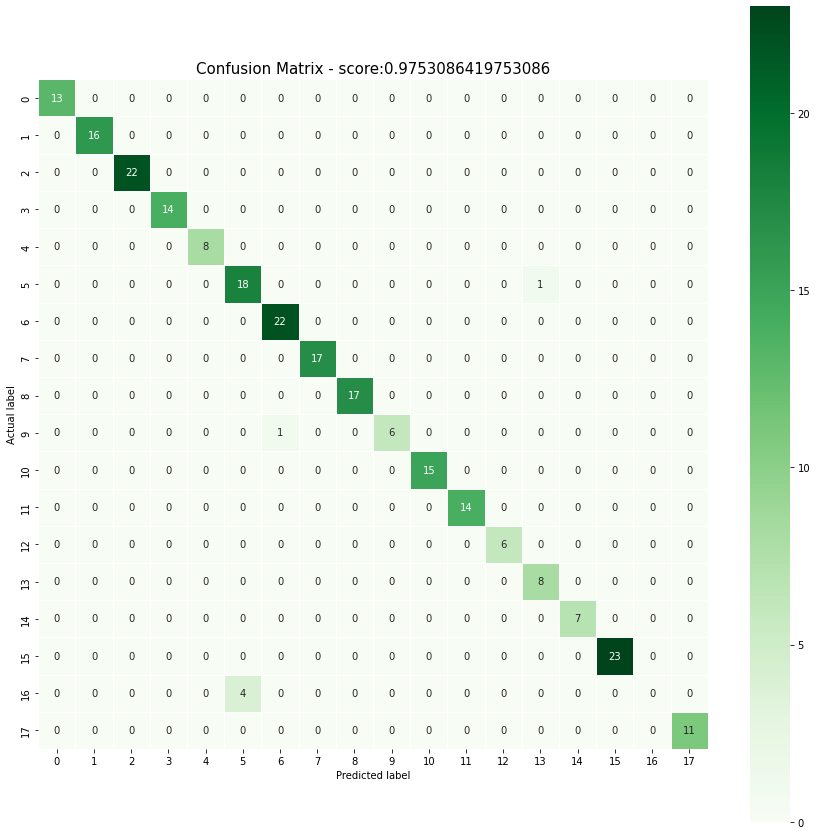

In [20]:
#Import libarary Support Vector Machines dan linier Support Vector Machines
from sklearn.svm import SVC

linear_svc = SVC(C=2, decision_function_shape='ovo',degree=3, gamma='scale',
                 kernel='poly', max_iter=-1, probability= True)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')

print(classification_report(y_test, Y_pred))
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, )
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, 
            cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,Y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [ ]:
# Import Library Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_prediction)
precision = precision_score(y_test, Y_prediction,average='micro')
recall =  recall_score(y_test, Y_prediction,average='micro')
f1 = f1_score(y_test,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)


In [ ]:
# Import Library Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier


decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(decision_tree  ,filled=True)
plt.show()

In [ ]:
#Modul terbaik
results = pd.DataFrame({
    'Model': ['KNN', 
              'Logistic Regression',
              'Naive Bayes',  
              'Support Vector Machine',
              'Random Forest',
              'Decision Tree'],
    'Score': [acc_knn,
              acc_log,
              acc_gaussian,  
              acc_linear_svc,
              acc_random_forest,
              acc_decision_tree],
    "Accuracy_score":[accuracy_knn,
                      accuracy_lr,
                      accuracy_nb,
                      accuracy_svc,
                      accuracy_rf,
                      accuracy_dt
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

# Train dataset tanpa feature N, P, K

In [ ]:
X=crop.drop(columns=["label","N","P","K"]).values
y=crop["label"].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

In [ ]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report

# Import libarary confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
#Train and Test split
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [ ]:
# Import libarary Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)

In [ ]:
# Import libarary KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test) 
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

In [ ]:
# Import libarary Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

In [ ]:
# Import libarary Support Vector Machines dan linier Support Vector Machines
from sklearn.svm import SVC

linear_svc = SVC(max_iter=4000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

In [ ]:
# Import Library Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_prediction)
precision = precision_score(y_test, Y_prediction,average='micro')
recall =  recall_score(y_test, Y_prediction,average='micro')
f1 = f1_score(y_test,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)


In [ ]:
# Import Library Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(decision_tree  ,filled=True)
plt.show()

In [ ]:
#Modul terbaik
results = pd.DataFrame({
    'Model': ['KNN', 
              'Logistic Regression',
              'Naive Bayes',  
              'Support Vector Machine',
              'Random Forest',
              'Decision Tree'],
    'Score': [acc_knn,
              acc_log,
              acc_gaussian,  
              acc_linear_svc,
              acc_random_forest,
              acc_decision_tree],
    "Accuracy_score":[accuracy_knn,
                      accuracy_lr,
                      accuracy_nb,
                      accuracy_svc,
                      accuracy_rf,
                      accuracy_dt
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

# TRAIN DATASET TANAMAN YANG COCOK DENGAN VARIABEL N,P,K

In [ ]:
X=crop.drop(columns="label").values
y=crop["label"].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

In [ ]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report

# Import libarary confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
#Train and Test split
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [ ]:
# Import libarary Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)

In [ ]:
# Import libarary KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test) 
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

In [ ]:
plt.subplots(figsize=(20,5))
a_index=list(range(1,50))
a=pd.Series()
x=range(1,50)
#x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,50)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train, y_train) 
    prediction=model.predict(X_test)
    a=a.append(pd.Series(accuracy_score(y_test,prediction)))
plt.plot(a_index, a,marker="*")
plt.xticks(x)
plt.xlabel("N,P,K")
plt.ylabel('Label')
plt.show()

In [ ]:
# Import libarary Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

In [ ]:
# Import libarary Support Vector Machines dan linier Support Vector Machines
from sklearn.svm import SVC

linear_svc = SVC(max_iter=4000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

In [ ]:
# Import Library Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, max_depth=20)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_prediction)
precision = precision_score(y_test, Y_prediction,average='micro')
recall =  recall_score(y_test, Y_prediction,average='micro')
f1 = f1_score(y_test,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)


In [ ]:
# Import Library Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(decision_tree  ,filled=True)
plt.show()

In [ ]:
#Modul terbaik
results = pd.DataFrame({
    'Model': ['KNN', 
              'Logistic Regression',
              'Naive Bayes',  
              'Support Vector Machine',
              'Random Forest',
              'Decision Tree'],
    'Score': [acc_knn,
              acc_log,
              acc_gaussian,  
              acc_linear_svc,
              acc_random_forest,
              acc_decision_tree],
    "Accuracy_score":[accuracy_knn,
                      accuracy_lr,
                      accuracy_nb,
                      accuracy_svc,
                      accuracy_rf,
                      accuracy_dt
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

In [ ]:
X=crop.drop(columns=["label"]).values
print(X.shape)
crop.isna().sum()

In [ ]:
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = (10,4)

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i,init = 'k-means++',max_iter = 100, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)
    
#Plotting the Results
plt.plot(range(1,11),wcss)
plt.title('Metode Elbow',fontsize = 20)
plt.xlabel('Banyak klasterisasi')
plt.ylabel('WCSS')
plt.show()

In [ ]:

k = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = k.fit_predict(X)

a = crop['label']
y_kmeans = pd.DataFrame(y_kmeans)
z = pd.concat([y_kmeans, a],axis = 1)
z = z.rename(columns = {0: 'cluster'})

#Checking Clusters of Each crop
print("Hasil setelah K-means \n")
print("Klaster pertama:", z[z['cluster'] == 0]['label'].unique())

print("Klaster kedua:", z[z['cluster'] == 1]['label'].unique())

print("Klaster ketiga:", z[z['cluster'] == 2]['label'].unique())

print("Klaster keempat:", z[z['cluster'] == 3]['label'].unique())

# MODEL PREDIKSI KECOCOKAN TANAMAN

In [ ]:
y = crop['label']
x = crop.drop(['label'],axis = 1)

print("Shape dari x:", x.shape)
print("Shape dari y:", y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)
print("X_train:\n", X_train.shape)
print("X_test:\n", X_test.shape)
print("y_train:\n", y_train.shape)
print("y_test:\n", y_test.shape)

In [ ]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
plt.rcParams['figure.figsize'] = [10,10]
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow_r')
plt.title('Confusion Matrix for Logistic Regression', fontsize=15)
plt.show()

In [ ]:
c= classification_report(y_test, y_pred)
print(c)

In [ ]:
crop.head()

In [ ]:
prediction = model.predict((np.array([[80,
                                       50,
                                       44,
                                       24,
                                       90,
                                       6.8,
                                       190]])))
print("Saran tanaman sesuai dengan iklim :", prediction)